In [11]:
!python /content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/train.py

Eğitim veri setindeki sınıf başına örnek sayısı:

	 0: 547
	 1: 566

Test veri setindeki sınıf başına örnek sayısı:

	 0: 93
	 1: 109
Epoch: 1 	 Training Loss: 0.533187 	 Validation Loss: 0.365139
Epoch: 2 	 Training Loss: 0.300915 	 Validation Loss: 0.229211
Epoch: 3 	 Training Loss: 0.206526 	 Validation Loss: 0.164546
Epoch: 4 	 Training Loss: 0.156622 	 Validation Loss: 0.133748
Epoch: 5 	 Training Loss: 0.126718 	 Validation Loss: 0.111072
Epoch: 6 	 Training Loss: 0.106291 	 Validation Loss: 0.092052
Epoch: 7 	 Training Loss: 0.092311 	 Validation Loss: 0.080212
Epoch: 8 	 Training Loss: 0.081344 	 Validation Loss: 0.071572
Epoch: 9 	 Training Loss: 0.073059 	 Validation Loss: 0.064519
Epoch: 10 	 Training Loss: 0.066304 	 Validation Loss: 0.058229


In [1]:
# test veri seti  doğruluk oranı
!python /content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/test.py

accuracy: 99.038462


In [2]:
import sys
sys.path.append("/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification")
from model import VisionTransformer
import torch
import torchvision.models as models
import torch.nn as nn

load_model = torch.load("/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/model_vit.pth")

vision_transformer = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)

# Çıkış sınıflarının sayısını değiştir
vision_transformer.heads = nn.Linear(in_features=768, out_features=2, bias=True)

vision_transformer.load_state_dict(load_model)

vision_transformer.eval()

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 142MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

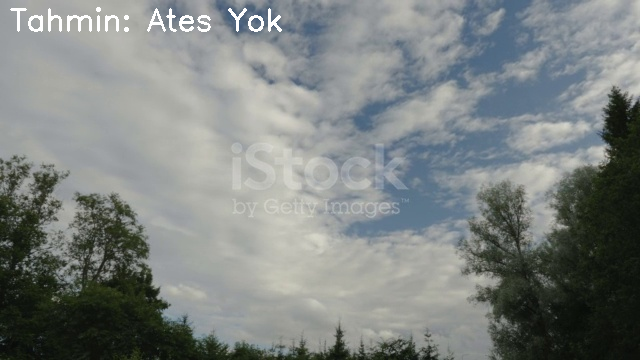

In [7]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Görüntüyü yükle
image_path = '/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/dataset/test/firenot/frame_a4034bae-f6d7-4116-a786-d60ef412ac67_fr.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler, bu yüzden RGB'ye dönüştürüyoruz

# Modelin eğitimde kullanılan boyutları
input_size = 224

# Görüntüyü boyutlandır ve transform et
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_image = transform(Image.fromarray(image)).unsqueeze(0)  # Model beklendiği gibi bir batch içermeli

# Modelden tahminleri al
with torch.no_grad():
    outputs = vision_transformer(input_image)

# Tahmin sonuçlarını alma
predicted_class = torch.argmax(outputs, dim=1).item()

if predicted_class == 0:
  pred = "Ates Var"

else:
  pred = "Ates Yok"

# Sonucu görüntü üzerine yaz
result_text = f"Tahmin: {pred}"
cv2.putText(image, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Sonucu içeren görüntüyü göster
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()


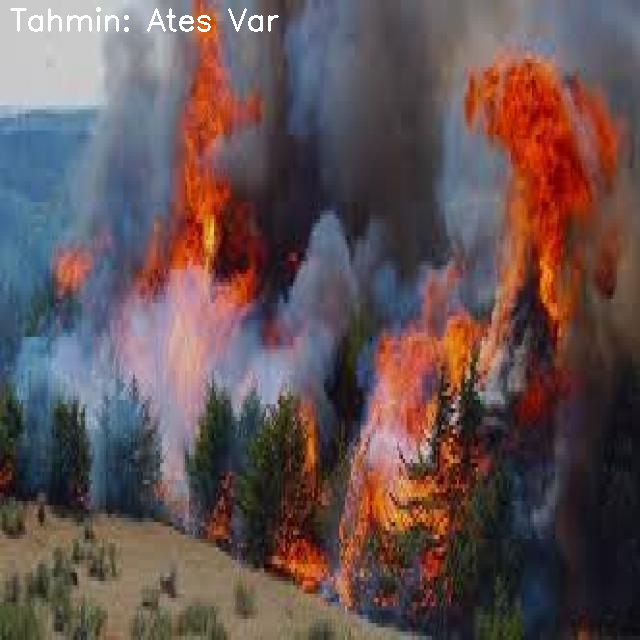

In [10]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Görüntüyü yükle
image_path = '/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/dataset/test/fire/fire-8712-80675188_png_jpg.rf.ae5739d27f22c6450bd5e0ce6e3d0623.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler, bu yüzden RGB'ye dönüştürüyoruz

# Modelin eğitimde kullanılan boyutları
input_size = 224

# Görüntüyü boyutlandır ve transform et
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_image = transform(Image.fromarray(image)).unsqueeze(0)  # Model beklendiği gibi bir batch içermeli

# Modelden tahminleri al
with torch.no_grad():
    outputs = vision_transformer(input_image)

# Tahmin sonuçlarını alma
predicted_class = torch.argmax(outputs, dim=1).item()

if predicted_class == 0:
  pred = "Ates Var"

else:
  pred = "Ates Yok"


# Sonucu görüntü üzerine yaz
result_text = f"Tahmin: {pred}"
cv2.putText(image, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Sonucu içeren görüntüyü göster
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()


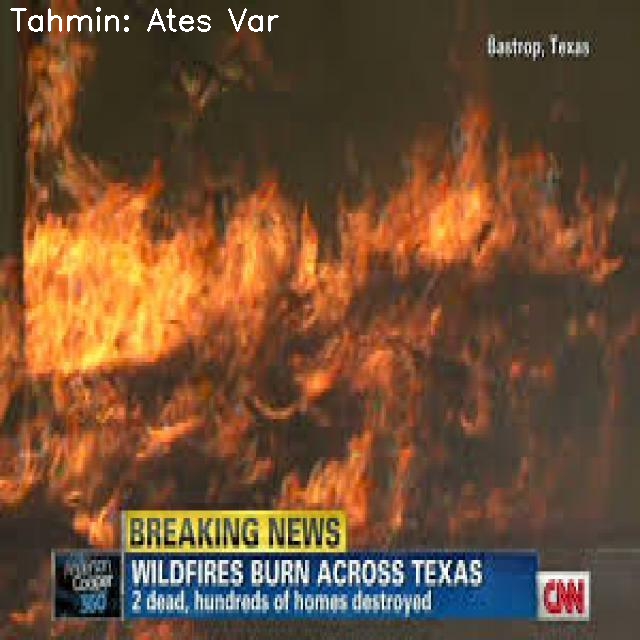

In [11]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Görüntüyü yükle
image_path = '/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/dataset/test/fire/fire-6908-99821956_png_jpg.rf.1144b1a864399174fc90e04f17078c5d.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler, bu yüzden RGB'ye dönüştürüyoruz

# Modelin eğitimde kullanılan boyutları
input_size = 224

# Görüntüyü boyutlandır ve transform et
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_image = transform(Image.fromarray(image)).unsqueeze(0)  # Model beklendiği gibi bir batch içermeli

# Modelden tahminleri al
with torch.no_grad():
    outputs = vision_transformer(input_image)

# Tahmin sonuçlarını alma
predicted_class = torch.argmax(outputs, dim=1).item()

if predicted_class == 0:
  pred = "Ates Var"

else:
  pred = "Ates Yok"


# Sonucu görüntü üzerine yaz
result_text = f"Tahmin: {pred}"
cv2.putText(image, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Sonucu içeren görüntüyü göster
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()


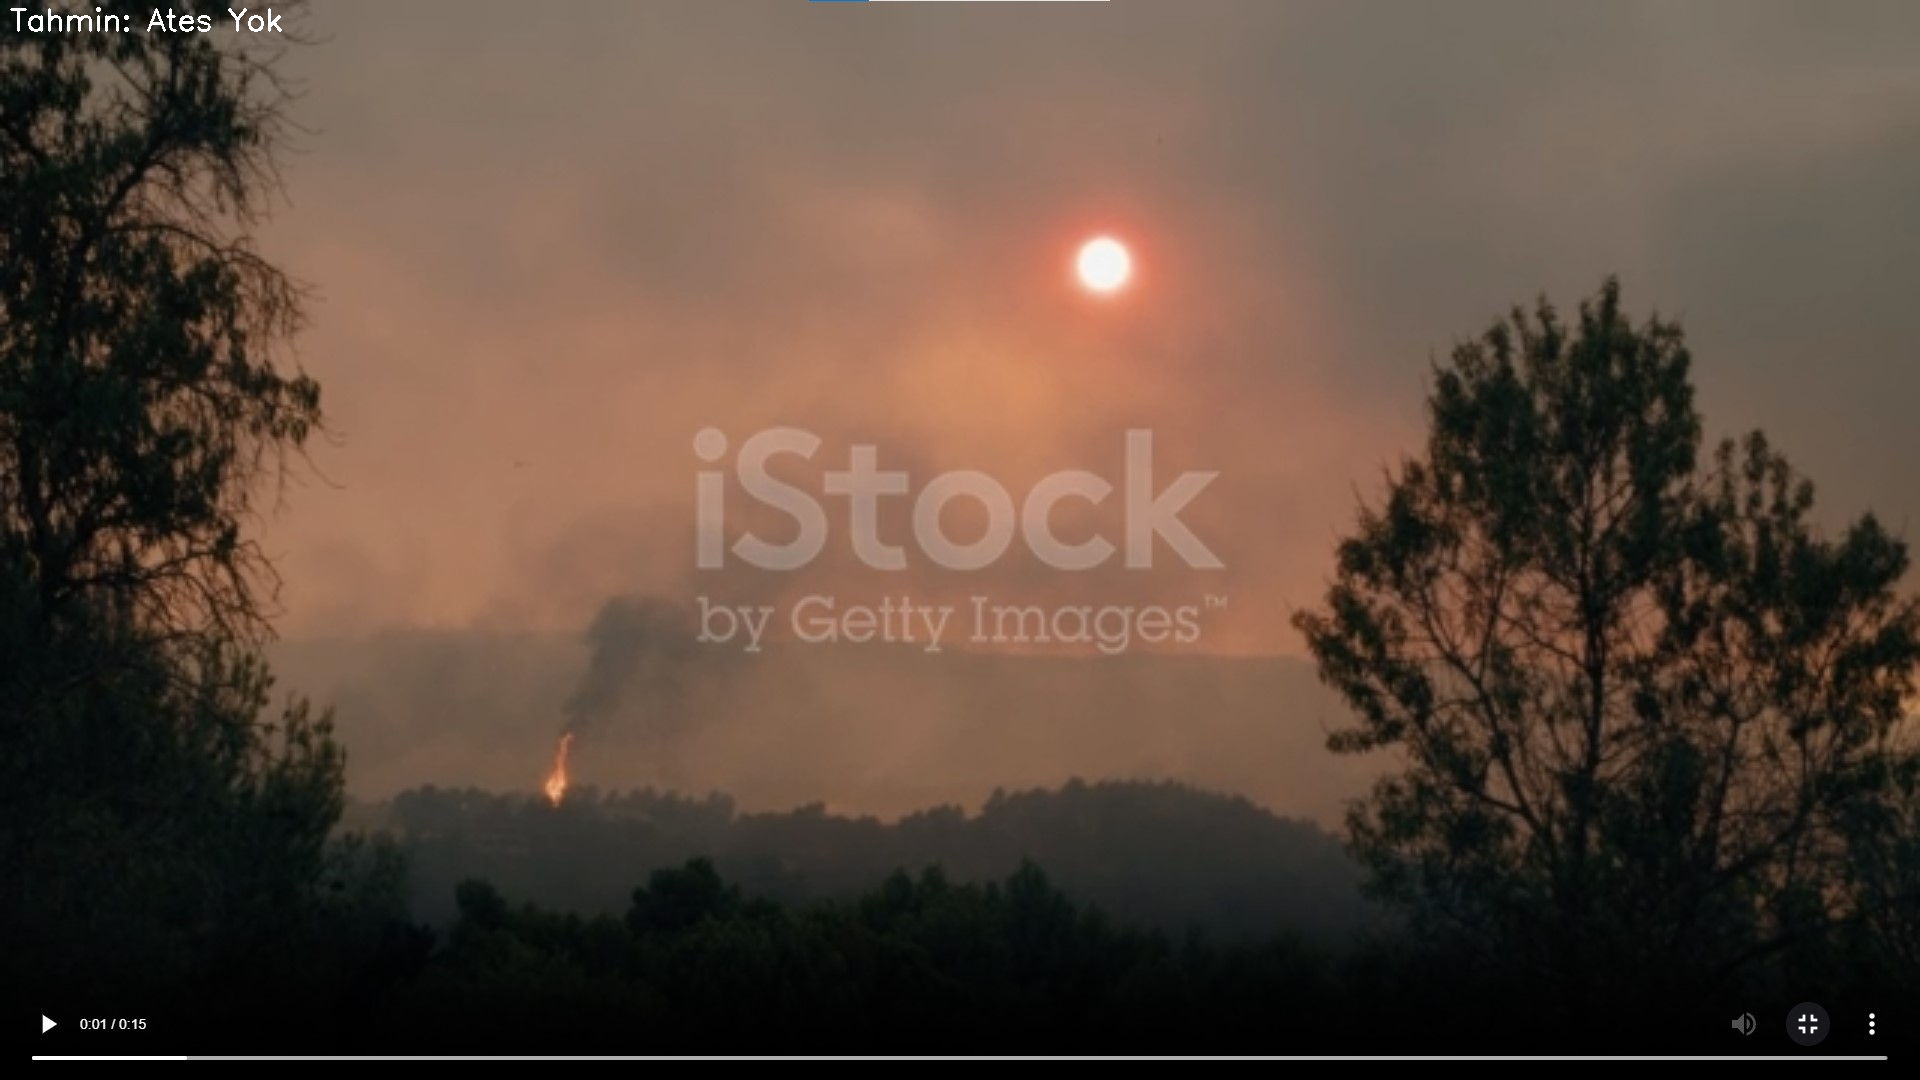

In [13]:
import cv2
import torch
from torchvision import transforms
from PIL import Image
from google.colab.patches import cv2_imshow

# Görüntüyü yükle
image_path = '/content/drive/MyDrive/vision_transformer_classification/vision_transformer_classification/deneme/fire1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler, bu yüzden RGB'ye dönüştürüyoruz

# Modelin eğitimde kullanılan boyutları
input_size = 224

# Görüntüyü boyutlandır ve transform et
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_image = transform(Image.fromarray(image)).unsqueeze(0)  # Model beklendiği gibi bir batch içermeli

# Modelden tahminleri al
with torch.no_grad():
    outputs = vision_transformer(input_image)

# Tahmin sonuçlarını alma
predicted_class = torch.argmax(outputs, dim=1).item()

if predicted_class == 0:
  pred = "Ates Var"

else:
  pred = "Ates Yok"


# Sonucu görüntü üzerine yaz
result_text = f"Tahmin: {pred}"
cv2.putText(image, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Sonucu içeren görüntüyü göster
cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()
